In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score
)

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

from utils.functions import show_random_images, plot_class_distributions

In [2]:
def data_norm(X):
    return X/255

In [3]:
# Fetch data
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()

# Summarize dataset, displaying number of train and test examples etc.
print('Train set data:')
print(Xtrain.shape)
print(ytrain.shape)
print('--------------')
print('Test set data:')
print(Xtest.shape)
print(ytest.shape)

Train set data:
(60000, 28, 28)
(60000,)
--------------
Test set data:
(10000, 28, 28)
(10000,)


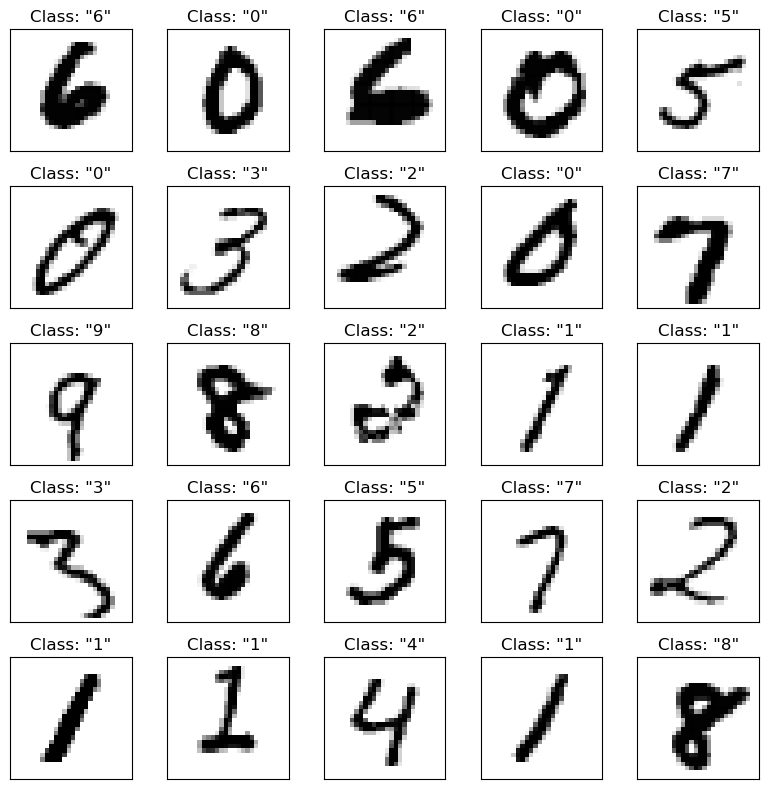

In [4]:
show_random_images(Xtrain, ytrain)

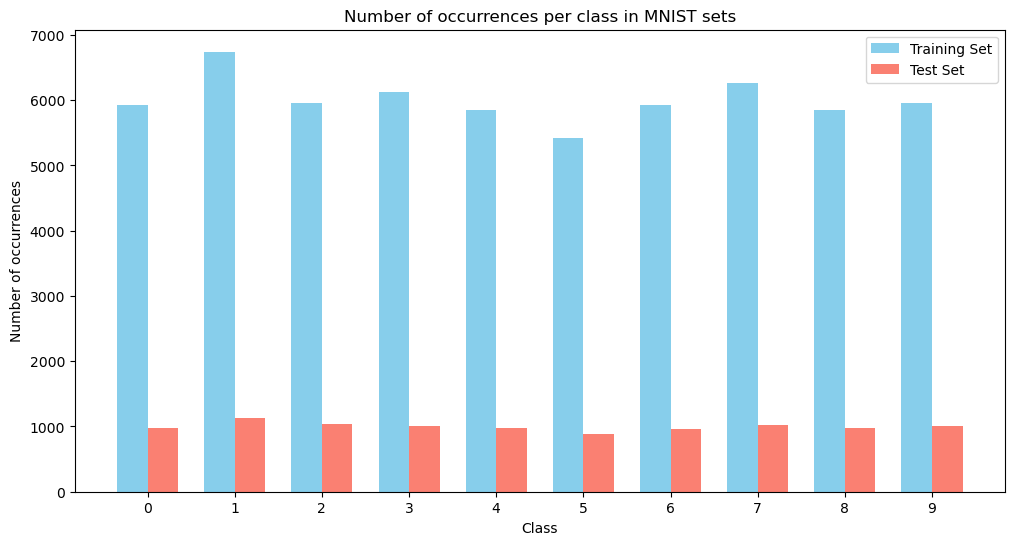

In [5]:
plot_class_distributions(ytrain, ytest, bar_width=0.35, figsize=(12, 6))

# Classification using CNN

In [6]:
# Normalize the images
Xtrain_norm = data_norm(Xtrain)
Xtest_norm = data_norm(Xtest)

print(f'Minimum pixel value: {np.min(Xtrain_norm[0])}')
print(f'Maximum pixel value: {np.max(Xtrain_norm[0])}')

# Update the training and testing data
Xtrain = Xtrain_norm.copy()
Xtest = Xtest_norm.copy()

Minimum pixel value: 0.0
Maximum pixel value: 1.0


In [7]:
# Add a channel dimension
Xtrain = np.expand_dims(Xtrain, -1)
Xtest = np.expand_dims(Xtest, -1)

print(f"Train set data: {Xtrain.shape}")
print(f"Test set data: {Xtest.shape}")


Train set data: (60000, 28, 28, 1)
Test set data: (10000, 28, 28, 1)


In [8]:
# Converting output labels to categorical
ytrain = tf.keras.utils.to_categorical(ytrain)
ytest = tf.keras.utils.to_categorical(ytest)

# Print the number of classes
num_classes = ytrain.shape[1]
print(f"Number of classes: {num_classes}")

Number of classes: 10


## Convolutional Neural Network Model

In [9]:
print(f"Input size: {Xtrain.shape}")

Input size: (60000, 28, 28, 1)


In [10]:
# Define network architecture
input_shape = Xtrain.shape[1:]  # Get shape (28, 28, 1) from training data

model = Sequential(
    [
        tf.keras.Input(shape=input_shape),
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)), 
        Flatten(),
        Dense(units=num_classes, activation='softmax')
    ], name="NN_ver_01"
)

model.summary()

Model: "NN_ver_01"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

### Train the network

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.7426 - loss: 0.1556 - val_accuracy: 0.9825 - val_loss: 0.0160
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9825 - loss: 0.0158 - val_accuracy: 0.9841 - val_loss: 0.0122
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9874 - loss: 0.0112 - val_accuracy: 0.9888 - val_loss: 0.0097
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.9904 - loss: 0.0089 - val_accuracy: 0.9878 - val_loss: 0.0111
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9926 - loss: 0.0074 - val_accuracy: 0.9907 - val_loss: 0.0087
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9932 - loss: 0.0067 - val_accuracy: 0.9899 - val_loss: 0.0090
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.9944 - loss: 0.0058 - val_accuracy: 0.9898 - val_loss: 0.0093
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.9951 - loss: 0.0051 - val_accu

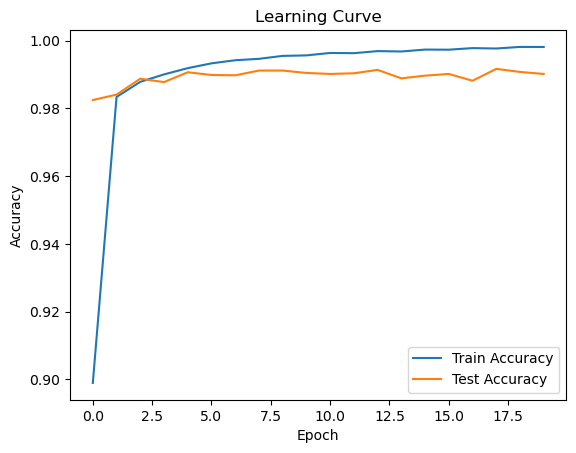

In [11]:
# Define parameters
batch_size = 256
epochs = 20
loss_fn = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam(0.01)

# Compile the model
model.compile(
    loss=loss_fn,
    optimizer=optimizer,
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    Xtrain, ytrain,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(Xtest, ytest),
)

# Plotting the training and test loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')

plt.title('Learning Curve')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Save the learning curve
plt.savefig('learning_curve.png')

plt.show()

In [12]:
# Evaluate the model
predictions_train = model.predict(Xtrain)
predictions_test = model.predict(Xtest)

# Convert predictions to class labels
yhat_train = np.argmax(predictions_train, axis=1)
yhat_test = np.argmax(predictions_test, axis=1)

# Convert true labels back to class labels
ytrain_labels = np.argmax(ytrain, axis=1)
ytest_labels = np.argmax(ytest, axis=1)

accuracy_train = accuracy_score(ytrain_labels, yhat_train)
accuracy_test = accuracy_score(ytest_labels, yhat_test)

print(f"Accuracy on a training set: {accuracy_train:.4f}")
print(f"Accuracy on a test set: {accuracy_test:.4f}")

# Print number of misclassified images
print(sum(ytest_labels != yhat_test))
print(f'Test size: {ytest_labels.shape[0]}')

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy on a training set: 0.9986
Accuracy on a test set: 0.9902
98
Test size: 10000
